In [197]:
#impoerting the dependency

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [198]:
housing = pd.read_csv("housing.csv")

In [199]:
housing.shape

(20640, 10)

In [200]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [201]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [202]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [203]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

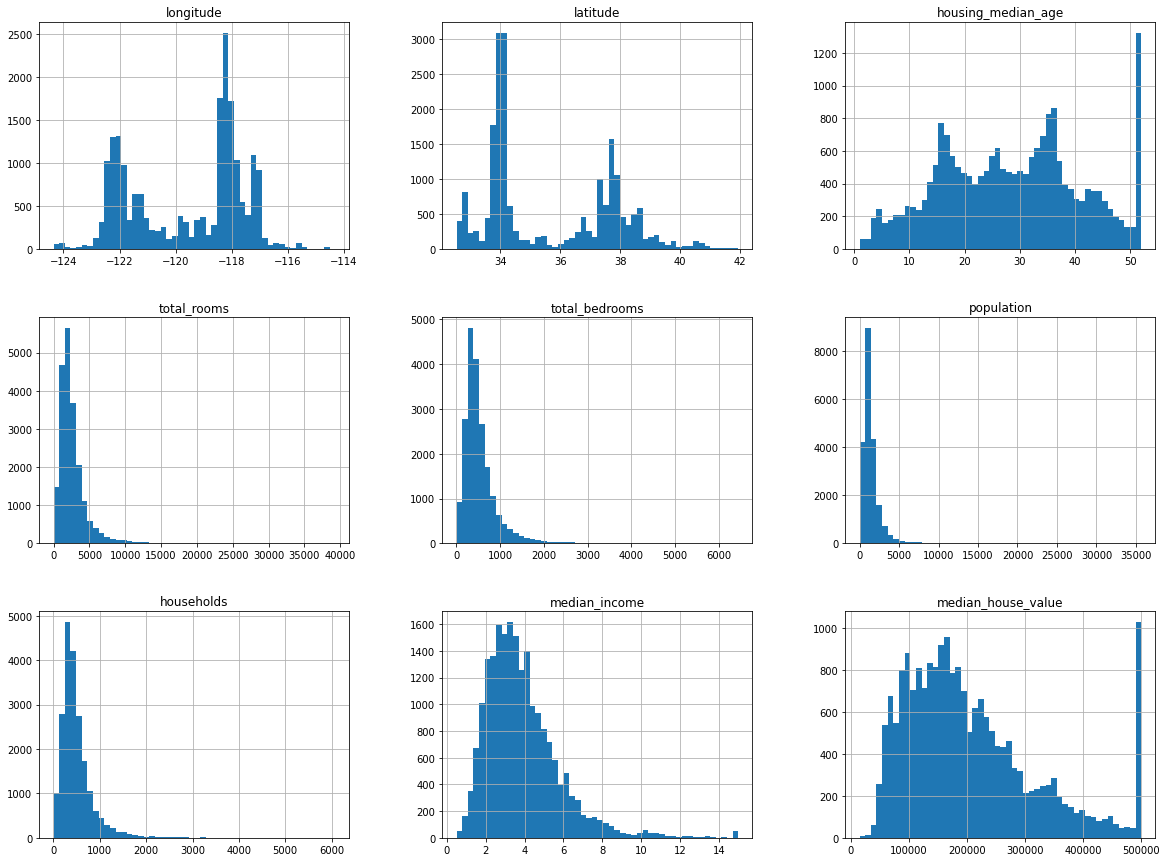

In [204]:
housing.hist(bins=50,figsize=(20,15))

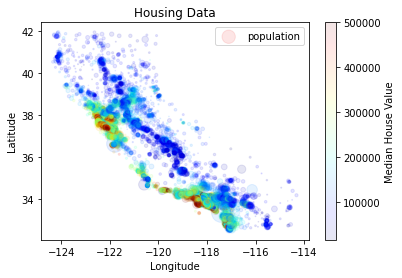

In [205]:
import matplotlib.pyplot as plt

plt.scatter(x=housing['longitude'], y=housing['latitude'], alpha=0.1,
            s=housing['population']/100, label='population', c=housing['median_house_value'], cmap='jet')
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Housing Data')
plt.legend()
plt.show()


In [206]:
# Assuming 'ocean_proximity' is a categorical column
housing_encoded = pd.get_dummies(housing,columns=['ocean_proximity'])

# Now all columns are numeric
corr_matrix = housing_encoded.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,0.321121,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.446969,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.045300,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.003031,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,0.074613,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,0.042435,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.168876,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.256617,-0.484859,0.023416,0.160284,0.141862
ocean_proximity_<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.018314,0.074613,0.042435,0.168876,0.256617,1.000000,-0.607669,-0.013872,-0.314813,-0.342620


In [207]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

In [208]:
housing['total_bedrooms'].isnull().value_counts()

total_bedrooms
False    20433
True       207
Name: count, dtype: int64

In [209]:
housing_na = housing.dropna(subset=['total_bedrooms'])
housing_na.shape

(20433, 10)

In [210]:
housing_na['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [211]:
dummies = pd.get_dummies(housing_na.ocean_proximity)
housing_na_dummies = pd.concat([housing_na,dummies],axis='columns')
housing_na_dummies.head()
housing_clean = housing_na_dummies.drop(columns=['ocean_proximity','ISLAND'])
housing_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


# Train and Evaluate a linear regression (OLS) model

In [230]:
#create features and lable dataset
x = housing_clean.drop(columns=['median_house_value'])
x.head()
y = housing_clean['median_house_value']
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [231]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1984)

In [226]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [228]:
#display the intercept and coefficients of the lr model
print('Intercept is'+str(lr.intercept_))
print('The set of coefficient are :'+str(OLS.coef_))
print('The R-squared values is:'+str(lr.score(x_train,y_train)))

Intercept is-2146719.495872314
The set of coefficient are :[-2.72191872e+04 -2.61224400e+04  1.03631750e+03 -6.39771322e+00
  9.97707401e+01 -3.73545857e+01  4.99035484e+01  3.93656164e+04
 -1.49036788e+05 -1.87787533e+05 -1.51883617e+05 -1.45673607e+05]
The R-squared values is:0.6433902949192565


In [229]:
# predicting with lr
y_pred = lr.predict(x_test)
performance = pd.DataFrame({'Prediction':y_pred,'Actual Values':y_test})
performance['error'] = (performance['Actual Values'] - performance['Prediction'])
performance.head()

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- const


In [217]:
# preparing data for plotting

performance.reset_index(drop=True,inplace=True)
performance.reset_index(inplace=True)
performance.head()


,index,Prediction,Actual Values,error
0,0,315646.738470,328200.0,12553.261530
1,1,235926.156196,156900.0,-79026.156196
2,2,157003.325611,87200.0,-69803.325611
3,3,172404.340246,141000.0,-31404.340246
4,4,82931.270634,100800.0,17868.729366


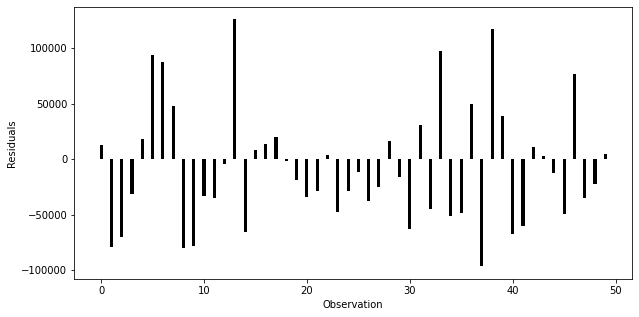

In [218]:
# plot the residuals

fig = plt.figure(figsize=(10,5))
plt.bar('index','error',data=performance[:50],color = 'black',width=0.3)
plt.xlabel('Observation')
plt.ylabel("Residuals")
plt.show()

In [219]:
#!pip install statsmodels


In [220]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
x_train.head()


,const,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
6885,1.0,-118.09,34.06,31.0,1146.0,289.0,1163.0,258.0,2.2083,True,False,False,False
4220,1.0,-118.28,34.12,50.0,2384.0,312.0,836.0,337.0,12.8763,True,False,False,False
9915,1.0,-122.31,38.33,21.0,1922.0,344.0,1051.0,342.0,3.6042,False,False,True,False
294,1.0,-122.17,37.77,39.0,1612.0,342.0,912.0,322.0,3.3958,False,False,True,False
6574,1.0,-118.16,34.20,43.0,1810.0,343.0,988.0,307.0,3.8203,True,False,False,False


In [225]:
import numpy as np

# Convert y_train to a numeric array
y_train = y_train.astype(float)

# Convert x_train to a numeric array
x_train = x_train.astype(float)

# Perform the regression analysis
x_train = sm.add_constant(x_train)
niceOLS = sm.OLS(y_train, x_train).fit()
niceOLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     2456.
Date:                Thu, 14 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:09:03   Log-Likelihood:            -2.0522e+05
No. Observations:               16346   AIC:                         4.105e+05
Df Residuals:                   16333   BIC:                         4.106e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.147e+06   1.05e+05    -20.413      0.000   -2.35e+06   -1.94e+06
longitude          -2.722e+04   1141.708    -23.841      0.000   -2.95e+04    -2.5e+04
latitude           -2.612e+04   1125.571    -23.208      0.000   -2.83e+04   -2.39e+04
housing_median_age  1036.3175     49.179     21.072      0.000     939.922    1132.713
total_rooms           -6.3977      0.891     -7.184      0.000      -8.143      -4.652
total_bedrooms        99.7707      7.613     13.105      0.000      84.848     114.694
population           -37.3546      1.189    -31.405      0.000     -39.686     -35.023
households            49.9035      8.223      6.069      0.000      33.786      66.021
median_income       3.937e+04    382.254    102.983      0.000    3.86e+04    4.01e+04
<1H OCEAN           -1.49e+05   3.43e+04     -4.339      0.000   -2.16e+05   -8.17e+04
INLAND             -1.878e+05   3.44e+04     -5.456      0.000   -2.55e+05    -1.2e+05
NEAR BAY           -1.519e+05   3.44e+04     -4.416      0.000   -2.19e+05   -8.45e+04
NEAR OCEAN         -1.457e+05   3.44e+04     -4.239      0.000   -2.13e+05   -7.83e+04
==============================================================================
Omnibus:                     4103.497   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16258.145
Skew:                           1.201   Prob(JB):                         0.00
Kurtosis:                       7.255   Cond. No.                     8.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""